# TOC:
[I. Image basics](#I.-Image-basics)<br>
[1.1 Load image](#1.1-Load-image)<br>
[1.2 What's a Pixel?](#1.2-What's-a-Pixel?)<br>
[1.3 Access and manipulate pixels](#1.3-Access-and-manipulate-pixels)<br>

[II. Drawing](#II.-Drawing)

[III. Image processing](#III.-Image-processing)<br>
[3.1 Image transformations](#3.1-Image-transformations)<br>
[3.2 Image Arithmetic](#3.2-Image-Arithmetic)<br>
3.3 Bitwise Operations<br>
3.4 Masking<br>
3.5 Splitting and Merging Channels<br>
3.6 Color Spaces<br>

# I. Image basics

## 1.1 Load image

In [1]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Load hình bằng opencv qua attribute imread. Trả lại một numpy array

In [13]:
image = cv2.imread("kadabra.jpg", 1)
print("height: %d pixels" % (image.shape[0]))
print("width: %d pixels" % (image.shape[1]))
print("channels: %d" % (image.shape[2]))

height: 281 pixels
width: 300 pixels
channels: 3


In [3]:
type(image)

numpy.ndarray

Hình này có shape theo thứ tự là chiều cao, chiều rộng, và channels

In [4]:
image.shape

(281, 300, 3)

Vẽ hình trên jupyter qua matplotlib

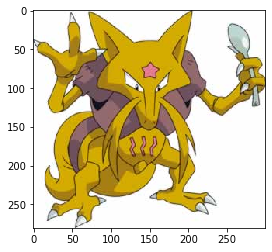

In [5]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

- Để thể hiện hình trên jupyter notebook ta thông qua code `cv2.cvtColor`. Và vì OpenCV trữ hình theo thứ tự ngược lại là BGR nên ta dùng `cv2.COLOR_BGR2RGB` để đổi lại thành RGB.
- Hình này ta load 3 channels RGB, tức là thành phần cấu tạo nên hình Red Green Blue
- Shape của hình là (281, 300, 3) tức là 281 cột và 300 hàng và 3 channels màu. Lý do là bởi numpy array trả về **số cột rồi mới số hàng**. (Trong khi ta viết trong ma trận là hàng trước rồi mới đến cột)

## 1.2 What's a Pixel?

Một hình ảnh thì bao gồm một bộ các pixels. Pixel là phần nguyên, từng khối của một hình. Hãy nghĩ hình ảnh là một cái mạng, mỗi ô vuông trong mạng là 1 pixel.<br>
Ví dụ: Hình ảnh trên có độ phân giải 281 x 300. Tức là mạng của hình ảnh này có 281 hàng và 300 cột. Theo đó sẽ có 281 x 300 = 84300 pixel.<br>

Hầu hết các pixel được đại diện theo 2 cách: grayscale và màu. Trong grayscale thì pixel nằm trong range 0 đến 255. 0 tương ứng với màu **đen** và 255 tương ứng với màu **trắng**. Giá trị giữa 0 và 255 là các sắc thái khác nhau của màu xám. Giá trị gần 0 thì màu tối và giá trị gần 255 thì màu sáng.<br>

Mỗi trong 3 màu RGB được đại diện bởi một giá trị nguyên trong khoảng 0 đến 255. Ta có thể kết hợp qua một tuple (r, g, b)

## 1.3 Access and manipulate pixels

Hình ảnh được đại diện bởi một mạng lưới các pixel. Tọa độ của hình ảnh được truy cập qua trục y và x theo hướng đi xuống và qua phải. Ví dụ hình chữ I sau là một mạng 8 x8 = 64 pixels, các tọa độ được truy cập như sau:
- (0,0) là góc bên trái trên cùng, tương ứng với cột thứ 0 và hàng thứ 0
- (7,7) là góc bên phải dưới cùng, tương ứng với cột thứ 7 và hàng thứ 7
- (3.4) tương ứng vị trí cột thứ 3 và hàng thứ 4 (python đếm từ 0)

<img src="I letter.png">

Như đã nói ở trên OpenCV trữ theo BGR nên ta phải đổi sang RGB

In [6]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Truy cập pixel đầu tiên ở vị trí góc bên trái trên cùng hình của con pokemon Kadabra và in ra bảng màu ở pixel đó

In [7]:
(r, g, b) = img[0,0]
print('pixel at (0,0) - Red %d, Green %d, Blue %d' % (r,g,b))

pixel at (0,0) - Red 254, Green 254, Blue 254


Truy cập thử phần góc

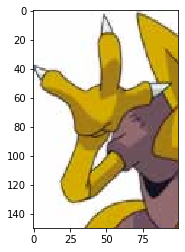

In [8]:
corner = img[0:150, 0:100]
plt.imshow(corner)
plt.show()

Biến đổi phần màu của corner đó. Lưu ý: [0:150] truy cập theo số lượng hàng và [0:100] theo số lượng cột. Diễn giải: lấy từ hàng 0 đến 150 và từ cột 0 đến 100

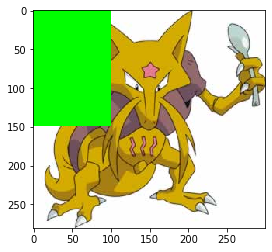

In [9]:
img[0:150, 0:100] = (0, 255, 0) # Green
plt.imshow(img)
plt.show()

Thử truy cập tọa độ vượt quá range hình xem sao. Ví dụ hình này có kích cỡ 281 X 300. Ta thử truy cập hình này với kích cỡ 290x100

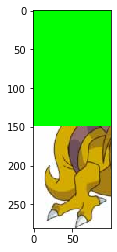

In [10]:
test = img[0:290, 0:100]
plt.imshow(test)
plt.show()

Kết luận: vẫn truy cập được

# II. Drawing

Sử dụng slice của numpy array thì vẽ được hình chữ nhật như trên. Vậy nếu muốn vẽ đường tròn, hoặc đường thẳng?<br>

OpenCV có 3 phương thức cơ bản là: `cv2.line` , `cv2.circle`, và `cv2.rectangle`

In [37]:
import numpy as np
import cv2

canvas = np.zeros((300,300,3), dtype='uint8')

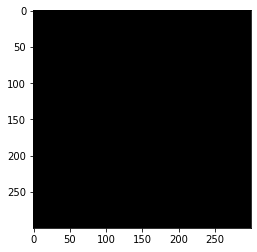

In [23]:
plt.imshow(canvas)
plt.show()

- Khởi tạo hình ảnh là một ma trận zeros kích thước 300x 300 , và cụ thể chỉ định 3 channels màu.
- Vì chúng ta muốn đại diện hình ảnh như một hình RGB với pixels ở range **[0 : 255]** nên dtype set 'uint8' tức là 8-bit unsigned integer

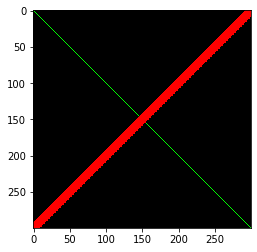

In [38]:
green = (0, 255, 0)
cv2.line(canvas, (0,0), (300,300), green)
red = (255, 0, 0)
cv2.line(canvas, (300,0), (0,300), red, 10)
plt.imshow(canvas)
plt.show()

`cv2.line` vẽ thì cần có background canvas, tọa độ điểm đầu-cuối, màu sắc, độ dày của line. Đường màu đỏ trên có độ dày là 10 pixels, ở đây nếu set là **-1** thì sẽ fill không gian trong đó.

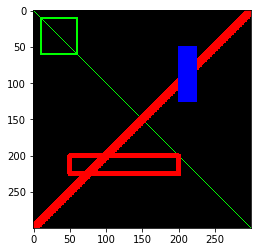

In [39]:
cv2.rectangle(canvas, (10, 10), (60, 60), green,2)
plt.imshow(canvas)
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
blue = (0,0, 255)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt.imshow(canvas)
plt.show()

**Vẽ đường tròn**

0
25
50
75
100
125
150


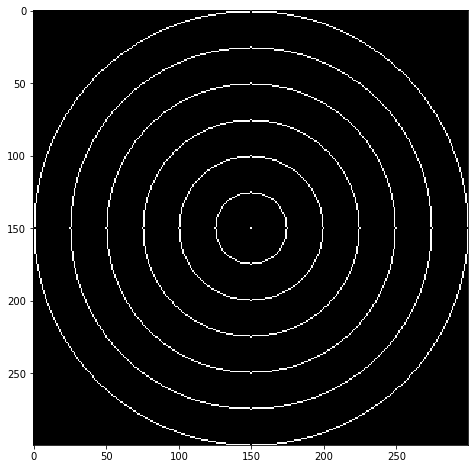

In [48]:
plt.figure(figsize=(8,8))
canvas = np.zeros((300, 300, 3), dtype='uint8')
(centerX, centerY )= (canvas.shape[1]//2 , canvas.shape[0]//2)
white = (255, 255, 255)

for r in range(0, 175, 25):
    cv2.circle(canvas, (centerX, centerY ), r, white)
    print(r)
plt.imshow(canvas)
plt.show()

Với r (radius) là bán kính, dấu chấm chính giữa là với bán kính bằng 0

Vẽ 25 đường tròn với màu sắc, trọng tâm và bán kính khác nhau

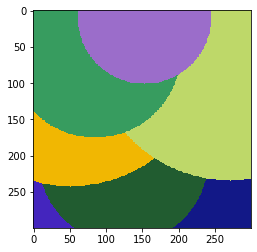

In [52]:
for i in range(0, 25):
    radius = np.random.randint(5, high = 200)
    color = np.random.randint(0, high = 256, size = (3,)).tolist() # để lấy 3 số nguyên random thì để size = (3,), sau đó biến về list
    pt = np.random.randint(0, high = 300, size = (2,))
    cv2.circle(canvas, tuple(pt), radius, color, -1) # tọa độ trọng tâm point phải là một tuple
    
plt.imshow(canvas)
plt.show()    

# III. Image processing

## 3.1 Image transformations

### 3.1.1 Translation

Translation là quá trình dịch chuyển hình ảnh đi theo trục x và y. Theo đó sử dụng translation, ta có thể di chuyển hình ảnh đi lên , đi xuống, sang trái, sang phải.

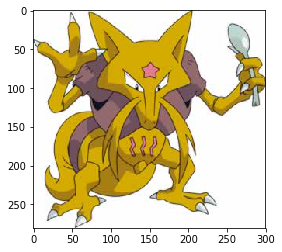

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("kadabra.jpg", 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Đầu tiên ta sẽ định ra ma trận M, ma trận này sẽ cho ta biết bao nhiêu pixel sang trái hoặc qua phải và lên trên hoặc xuống dưới sẽ bị di chuyển. Ma trận translation M được định ra như một float array.<br>
- Hàng đầu tiên của ma trận này là [1,0 tx], tx là số lượng pixel sẽ di chuyển sang trái hoặc sang phải, **tx dương** thì đi **sang phải**, **tx âm** thì đi **sang trái**.
- Hàng thứ hai của ma trận này là [0,1,ty] ty là số lượng pixel sẽ di chuyển lên trên hoặc xuống dưới, **ty dương** thì đi **xuống dưới**, **ty âm** thì thì đi **lên trên**.

Hình bên dưới cho thấy di chuyển sang phải 25 pixels và đi xuống 50 pixels.<br>
Muốn translation thì dùng `cv2.warpAffine`, cho vào các thông số : hình, ma trận, và số chiều của hình

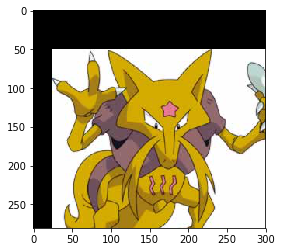

In [3]:
M = np.float32([[1,0,25], [0,1,50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))
plt.show()

Sang trái 50 pixels và lên trên 90 pixels

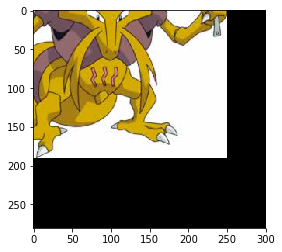

In [4]:
M = np.float32([[1, 0, -50], [0,1,-90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))
plt.show()

Thử với package imutils. Import package này thì tức là import luôn numpy, cv2, sys

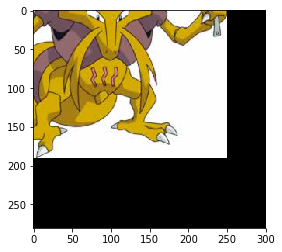

In [7]:
import imutils
shifted = imutils.translate(image, -50, -90)
plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))
plt.show()

Dòng lệnh ngắn hơn ban đầu và có vẻ dễ hiểu hơn

### 3.1.2 Rotation

Đúng theo tên gọi, tức là xoay hình ảnh (theo góc)

In [8]:
image.shape

(281, 300, 3)

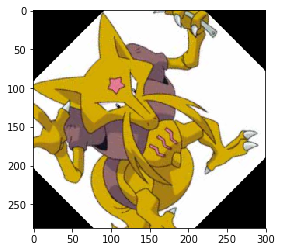

In [20]:
(h, w) = image.shape[:2] # lấy height và width của hình
center = (w/2, h/2) # lấy tọa độ trung tâm

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

Giải thích:
- Numpy array là **cột trước, hàng sau** mà tọa độ của hình thì cũng như tọa độ ma trận là **lấy hàng trước cột sau**. Nên mới phải đảo lại và chia 2 để có tọa độ trung tâm
- Ở chỗ `cv2.getRotationMatrix2D` là từ tọa độ center, đảo 45 độ , với kích cỡ 1.0 so với kích cỡ cũ

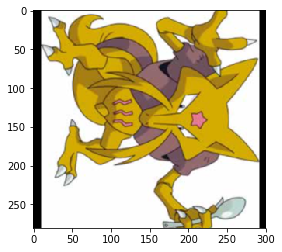

In [12]:
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

**Thử bằng imutils**

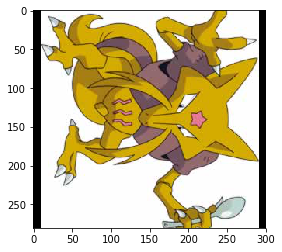

In [15]:
rotated = imutils.rotate(image, -90)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

### 3.1.3 Resizing

In [22]:
# resize theo height
r = 150.0/image.shape[0]
dim = (int(image.shape[1]*r), 150)
resized = cv2.resize(image, dim, interpolation= cv2.INTER_AREA)
resized.shape

(150, 160, 3)

In [23]:
resized = imutils.resize(image, height=150)
resized.shape

(150, 160, 3)

### 3.1.4 Flipping

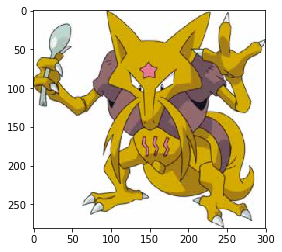

In [24]:
flipped = cv2.flip(image, 1)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.show()

**1** là lật hình theo chiều ngang - qua trục y, **0** là theo chiều dọc- theo trục x, **-1** là qua cả 2 chiều

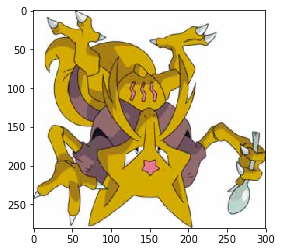

In [25]:
flipped = cv2.flip(image, 0)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.show()

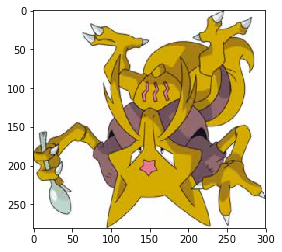

In [26]:
flipped = cv2.flip(image, -1)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.show()

### 3.1.5 Cropping

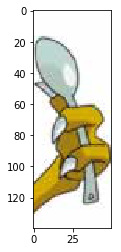

In [30]:
cropped =  image[0:140 , 250:300]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show()

## 3.2 Image Arithmetic

In [6]:
print('max of 255:' + str(cv2.add(np.uint8([200]), np.uint8([100]))) )
print('min of 0' + str(cv2.subtract(np.uint8([50]), np.uint8([100]))))

max of 255:[[255]]
min of 0[[0]]


In [9]:
print("wrap around: " + str(np.uint8([200]) + np.uint8([100])))
print("wrap around: " + str(np.uint8([50]) - np.uint8([100])))

wrap around: [44]
wrap around: [206]


**Số học của hình ảnh.**<br>
Hình RGB có pixel rơi vào range [0:255] nên việc mở rộng hay rút đi pixel này thành một số vượt quá range này không phải giá trị hợp lệ. Có 2 cách:
- Nếu vượt quá 255 thì max là 255 và dưới 0 thì min là 0
- Hoặc wrap, nếu quá 255 thì bắt đầu đếm lại từ đầu hoặc dưới 0 thì trừ ngược lại từ 255 xuống (đếm từ 0)

Định ra một ma trận M, có cùng kích cỡ hình, sử dụng 8-bit unsigned integers cho datatype. Fill ma trận với giá trị 100 (100 x 1= 100). Sau cùng dùng `cv2.add` để cộng ma trận có giá trị 100 này với ma trận của hình RGB. Giá trị nào vượt quá 255 sẽ bị cắt xén đi.<br>
Suy ra ở phép cộng này. Các pixel màu trắng (255) sẽ giữ nguyên, trong khi các màu tối hơn - ví dụ màu đen (0) giờ sẽ sáng hơn vì đã thành (100)

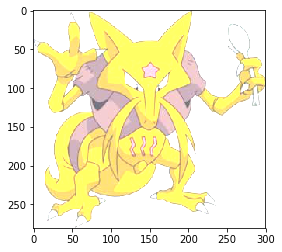

In [10]:
M = np.ones(image.shape, dtype='uint8')*100
added = cv2.add(image, M)
plt.imshow(cv2.cvtColor(added, cv2.COLOR_BGR2RGB))
plt.show()

Tương tự như bên dưới làm bức hình tối hơn. Trong khi pixel nào có giá trị từ 50 đổ xuống thì giữ nguyên

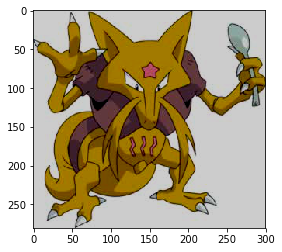

In [11]:
M = np.ones(image.shape, dtype='uint8')*50
added = cv2.subtract(image, M)
plt.imshow(cv2.cvtColor(added, cv2.COLOR_BGR2RGB))
plt.show()

## 3.3 Bitwise Operations

Four bitwise operations: AND, OR, XOR, and NOT

Rules:
- AND: A bitwise AND is true if and only if both pixels are greater than zero.
- OR: A bitwise OR is true if either of the two pixels are greater than zero.
- XOR: A bitwise XOR is true if and only if the two pixels are greater than zero, but not both.
- NOT: A bitwise NOT inverts the “on” and “off” pixels in an image.

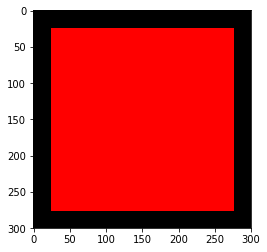

In [7]:
M = np.zeros((300,300,3), dtype='uint8')
rectangle= cv2.rectangle(M, (25,25), (275,275), 255, -1)
plt.imshow(rectangle)
plt.show()

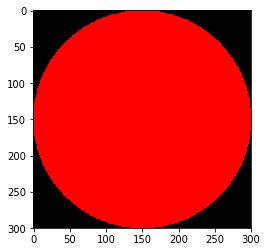

In [6]:
circle = np.zeros((300, 300,3), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
plt.imshow(circle)
plt.show()

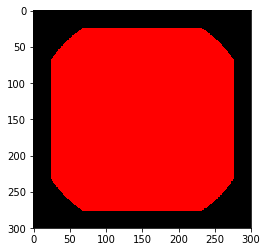

In [8]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
plt.imshow(bitwiseAnd)
plt.show()

## 3.4 Masking 

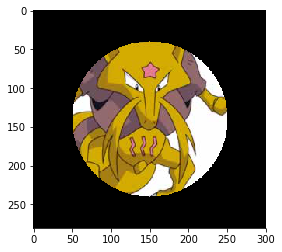

In [17]:
(cX, cY) = (int(image.shape[1] / 2), int(image.shape[0] / 2))
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.show()

## 3.5 Splitting and Merging Channels

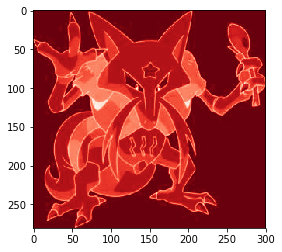

In [39]:
(B, G, R) = cv2.split(image)
plt.imshow(R, cmap='Reds')
plt.show()

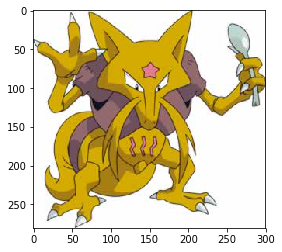

In [36]:
merged = cv2.merge([B, G, R])
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.show()

## 3.6 Color Spaces

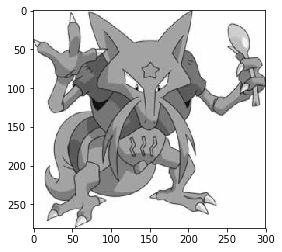

In [40]:
image = cv2.imread("kadabra.jpg", 0)
plt.imshow(image, cmap="gray")
plt.show()